In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

[ 0.8502906  -1.617328    1.40352482  1.20990525 -0.22492483  0.15282555
 -0.4919887   0.7397587  -1.7618156   0.26253511  1.05303037  1.30914922
  0.97989525  1.96624253  1.15411573  0.4352291   1.88378484  0.99156737
 -0.67107922  0.48445821  0.42080744  0.38082407 -0.10052616  0.20350762
  0.63882056 -0.58156378 -1.12902057  0.34945979 -0.22651404  2.6191749
 -1.06006632  0.94949417 -0.90437482 -0.6194653   0.75920732 -0.40250649
  0.27621484 -0.88168068 -0.81986535  1.07897679]


<function matplotlib.pyplot.show(close=None, block=None)>

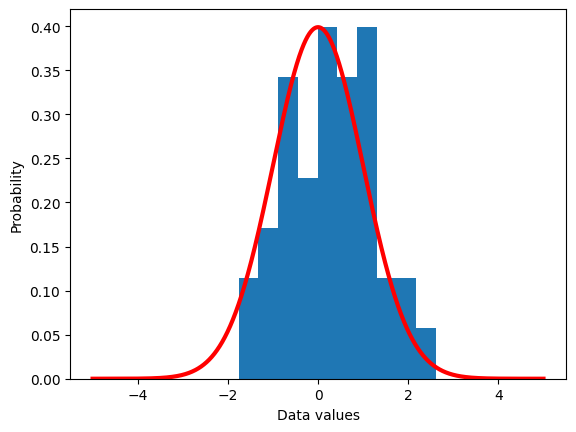

In [38]:
## a theoretical normal distribution
x= np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)#표준분포의 확률밀도
#theoNormDist = theoNormDist*np.mean(np.diff(x))

# now for our experiment
numSamples = 40

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
for expi in range(numSamples):
    sampledata[expi] = np.random.randn()

print(sampledata)
# show the results
plt.hist(sampledata, density=True) # 확률밀도, 각 구간에 표본데이터가 속할 확률
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show

## 샘플을 40개만 추출했기 때문에 모집단 분포와는 다르지만, 400개를 추출하면 대략적으 비슷한 분포를 따른다.

In [33]:
## show the mean of samples of a known distribution

# generate population data with known mean
populationN = 1000000
population = np.random.randn(populationN)
# 표본 변동성 계산 
population = population - np.mean(population)# 표본값-평균값을 하여 중앙값을 0으로 조정(결과를 잘 보기 위해)

# now we draw a random sample from that population
# 표본낼 샘플의 수
samplesize= 30

# the random indices to select from the popultion
# 무작위로 samplesize만큼의 샘플 뽑아 평균을 냄(표본평균)
sampleidx = np.random.randint(0,populationN,samplesize)
samplemean = np.mean(population[sampleidx])

### how does the sample mean compare to the population mean?
print(samplemean)

0.10077515305015101


/var/folders/vl/r365j2vx2wv3v02bqbw29rk80000gn/T/ipykernel_30540/3081738339.py:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Sample means','Population mean')


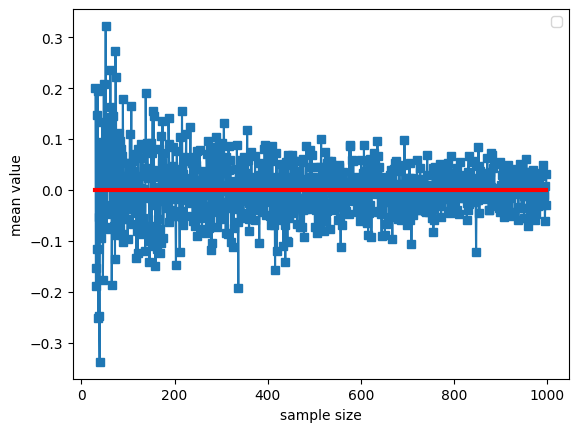

In [28]:
## repeat for different sample sizes
samplesizes = np.arange(30,1000)

samplemeans = np.zeros(len(samplesizes))

# 30~1000 개의 샘플들의 표본 평균을 구함
for sampi in range(len(samplesizes)):
    #nearly the some code as above
    sampleidx = np.random.randint(0,populationN,samplesizes[sampi])
    samplemeans[sampi] = np.mean(population[sampleidx])


# show the results!
plt.plot(samplesizes,samplemeans,'s-')
# 빨간줄 - 실제 모집단의 평균
plt.plot(samplesizes[[0,-1]],[np.mean(population),np.mean(population)],'r',linewidth=3)
plt.xlabel('sample size')
plt.ylabel('mean value')
plt.legend('Sample means','Population mean')
plt.show()

In [31]:
#그러나 샘플 평균들의 평균, 즉 여러 샘플 평균을 평균내는 것이 
#실제로 단순히 샘플을 추출하는 것보다 더 빨리 진정한 모집단 평균에 훨씬 더 가까워진다.
np.mean(samplemeans[:102])

0.00861388619337425